In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, make_scorer, confusion_matrix, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
import lightgbm as lgb
from skopt.space import Real, Integer, Categorical
from skopt import BayesSearchCV

In [2]:
best_set = ['m_p_r_eta',
 'm_ac_privilegio_lavoratori_sett_pubblico',
 'm_ac_propensioneRischio_italia_vs_europa',
 'm_ac_importanza_partiti',
 'm_ac_diminuzione_ruolo_partiti',
 'm_ac_affidamento_pubblica_tecnici',
 'm_ac_valori_resistenza_altra_epoca',
 'm_ac_sindacato_ancoraUtile',
 'm_ac_uguaglianza_sociale_frena_individui',
 'm_ac_troppo_focus_uguaglianza_vs_merito',
 'm_ac_meglio_uguaglianza_vs_merito_singolo',
 'm_op_disorientamento_veros_realta_quotidiana',
 'm_ac_vantaggi_globalizz_economie_mercati',
 'm_ac_dovere_difesa_produzPaese_vs_globaliz',
 'm_ac_nonSicuro_doveVive',
 'm_ac_repressione_unicaArma_vs_crimin',
 'm_ac_crimin_diventera_incontenibile',
 'm_ac_validita_insegnamChiesa',
 'm_ac_societa_troppoPermissiva_gay',
 'm_ac_legalizz_drogheLeggere',
 'm_ac_chiesa_nonDovrebbe_condizionare_stato.1',
 'm_ac_testamento_biologico',
 'm_ac_immigrati_rubano_lavoro',
 'm_ac_immigrati_risorsa',
 'm_ac_immigrati_portano_criminalita',
 'm_ac_immigrati_devono_adeguarsi',
 'm_ac_immigrati_diritto_voto',
 'm_ac_immigrati_nonRispettano_regoleDelloStareInsieme',
 'm_op_sentimento_italianoVSeuropeo',
 'm_ac_modernizzazioneItalia_grazie_UE',
 'm_ac_religioneIslamica_pericoloPerTutti',
 'm_ac_musulmaniInItalia_dirittoReligione_inScuole',
 'm_ac_italia_troppeConcessioni_immigratiMusulmani',
 'm_ac_generazioniFuture_vivrannoPeggio',
 'm_op_partecipazione_in_UE',
 'm_ac_troppo_allarmismo_ecologia_inquinamento',
 'm_ac_sviluppoEconomico_incompatibileCon_tutelaAmbiente',
 'm_ac_preoccupazione_situazioneAmbientale_luogoInCuiVivo',
 'm_ac_difesa_scuolaPubblica_insensata',
 'm_ac_attuale_classeInsegnante_incompetente',
 'm_ac_problemi_eticiMorali_sperimentazioneGenetica',
 'm_ac_nord_unicoMotore_economiaItaliana',
 'm_ac_lavoroNord_consente_diEssere_alPasso_con_UE',
 'm_ac_guerre_talvolta_maleNecessario.1',
 'm_ac_italia_ipartecipazioneIn_missioniMilitariEstere',
 'm_ac_lavorare_importante_postoStabile_no',
 'm_op_rinuncie_per_postoStabile',
 'm_ac_badare_propriInteressi_perSopravvivere',
 'm_ac_modelloImprenditorialePrivato_unico_produceRicchezzaPerTutti',
 'm_ac_modelloImprenditorialePrivato_unico_garantireEquita',
 'm_ac_italia_riparte_solo_puntandoSu_cittaEterritori_noStatoCentrale',
 'm_ac_dazi_su_produzioni_importanti',
 'm_ac_generazionePrecedente_migliore_qualitaVita',
 'm_ac_meno_relazioniSociali_amicali_vs_qualcheAnnoFa',
 'm_op_fiducia_negli_amici_che_fanno_parte_della_sua_rete_social_network',
 'm_op_fiducia_nei_suoi_parenti',
 'm_op_fiducia_negli_amici_e_conoscenti_dei_suoi_familiari',
 'm_op_fiducia_nei_colleghi_di_lavoro',
 'm_op_aiutoReciproco_inCasoDiBisogno_degli_italiani',
 'm_op_aiutoReciproco_inCasoDiBisogno_dei_colleghi_di_lavoro',
 'm_op_ottica_di_beneComune_italia',
 'm_op_ottica_di_beneComune_comuneResidenza',
 'm_op_attivita_associazionismo_Italia',
 'm_op_importanza_nellaSocieta_altruismo',
 'm_op_importanza_nellaSocieta_mutualismo',
 'm_op_danni_populismo_in_italia',
 'm_op_peso_volontariato_in_economiaPaese',
 'm_TREND_25_IMMIGRAZIONE_atteggiamento_POSITIVO_nei_confronti_degli_immigrati',
 'm_TREND_26_NAZIONE_EUROPA',
 'm_TREND_30_ISLAM_tolleranza_e_fiducia_nei_confronti_dell_Islam',
 'm_TREND_53_IL_PERICOLO_POPULISTA',
 'm_p_int_voto']

In [3]:
column_names = {
    'm_p_r_eta': 'Age',
    'm_ac_privilegio_lavoratori_sett_pubblico': 'Public Sector Worker Privilege',
    'm_ac_propensioneRischio_italia_vs_europa': 'Risk Propensity Italy vs Europe',
    'm_ac_importanza_partiti': 'Importance of Parties',
    'm_ac_diminuzione_ruolo_partiti': 'Decrease in Party Role',
    'm_ac_affidamento_pubblica_tecnici': 'Reliance on Public Technocrats',
    'm_ac_valori_resistenza_altra_epoca': 'Resistance Values from Another Era',
    'm_ac_sindacato_ancoraUtile': 'Unions Still Useful',
    'm_ac_uguaglianza_sociale_frena_individui': 'Social Equality Restrains Individuals',
    'm_ac_troppo_focus_uguaglianza_vs_merito': 'Too Much Focus on Equality vs Merit',
    'm_ac_meglio_uguaglianza_vs_merito_singolo': 'Better Equality vs Individual Merit',
    'm_op_disorientamento_veros_realta_quotidiana': 'Disorientation vs Daily Reality',
    'm_ac_vantaggi_globalizz_economie_mercati': 'Globalization Advantages in Markets',
    'm_ac_dovere_difesa_produzPaese_vs_globaliz': 'Duty to Defend National Production',
    'm_ac_nonSicuro_doveVive': 'Not Safe Where You Live',
    'm_ac_repressione_unicaArma_vs_crimin': 'Repression as Only Weapon Against Crime',
    'm_ac_crimin_diventera_incontenibile': 'Crime Will Become Uncontainable',
    'm_ac_validita_insegnamChiesa': 'Validity of Church Teachings',
    'm_ac_societa_troppoPermissiva_gay': 'Society Too Permissive of Gays',
    'm_ac_legalizz_drogheLeggere': 'Legalization of Soft Drugs',
    'm_ac_chiesa_nonDovrebbe_condizionare_stato.1': 'Church Shouldn’t Influence State',
    'm_ac_testamento_biologico': 'Biological Will',
    'm_ac_immigrati_rubano_lavoro': 'Immigrants Steal Jobs',
    'm_ac_immigrati_risorsa': 'Immigrants as a Resource',
    'm_ac_immigrati_portano_criminalita': 'Immigrants Bring Crime',
    'm_ac_immigrati_devono_adeguarsi': 'Immigrants Must Adapt',
    'm_ac_immigrati_diritto_voto': 'Immigrants’ Right to Vote',
    'm_ac_immigrati_nonRispettano_regoleDelloStareInsieme': 'Immigrants Don’t Respect Social Rules',
    'm_op_sentimento_italianoVSeuropeo': 'Italian vs European Sentiment',
    'm_ac_modernizzazioneItalia_grazie_UE': 'Modernization of Italy Thanks to EU',
    'm_ac_religioneIslamica_pericoloPerTutti': 'Islamic Religion as Danger to All',
    'm_ac_musulmaniInItalia_dirittoReligione_inScuole': 'Muslims’ Right to Religion in Schools',
    'm_ac_italia_troppeConcessioni_immigratiMusulmani': 'Too Many Concessions to Muslim Immigrants',
    'm_ac_generazioniFuture_vivrannoPeggio': 'Future Generations Will Live Worse',
    'm_op_partecipazione_in_UE': 'Participation in EU',
    'm_ac_troppo_allarmismo_ecologia_inquinamento': 'Too Much Alarmism About Ecology and Pollution',
    'm_ac_sviluppoEconomico_incompatibileCon_tutelaAmbiente': 'Economic Development Incompatible with Environmental Protection',
    'm_ac_preoccupazione_situazioneAmbientale_luogoInCuiVivo': 'Concern About Environmental Situation Where You Live',
    'm_ac_difesa_scuolaPubblica_insensata': 'Defending Public School is Nonsensical',
    'm_ac_attuale_classeInsegnante_incompetente': 'Current Teaching Staff Incompetent',
    'm_ac_problemi_eticiMorali_sperimentazioneGenetica': 'Ethical and Moral Issues in Genetic Experimentation',
    'm_ac_nord_unicoMotore_economiaItaliana': 'North is the Only Engine of Italian Economy',
    'm_ac_lavoroNord_consente_diEssere_alPasso_con_UE': 'Work in North Keeps Pace with EU',
    'm_ac_guerre_talvolta_maleNecessario.1': 'Wars Sometimes a Necessary Evil',
    'm_ac_italia_ipartecipazioneIn_missioniMilitariEstere': 'Participation in Foreign Military Missions',
    'm_ac_lavorare_importante_postoStabile_no': 'Work Important but Not a Stable Job',
    'm_op_rinuncie_per_postoStabile': 'Sacrifices for a Stable Job',
    'm_ac_badare_propriInteressi_perSopravvivere': 'Look After Own Interests to Survive',
    'm_ac_modelloImprenditorialePrivato_unico_produceRicchezzaPerTutti': 'Private Entrepreneurial Model Produces Wealth for All',
    'm_ac_modelloImprenditorialePrivato_unico_garantireEquita': 'Private Entrepreneurial Model Ensures Fairness',
    'm_ac_italia_riparte_solo_puntandoSu_cittaEterritori_noStatoCentrale': 'Revives by Focusing on Cities and Territories, Not Central State',
    'm_ac_dazi_su_produzioni_importanti': 'Tariffs on Important Productions',
    'm_ac_generazionePrecedente_migliore_qualitaVita': 'Previous Generation Had Better Quality of Life',
    'm_ac_meno_relazioniSociali_amicali_vs_qualcheAnnoFa': 'Fewer Social and Friendly Relations Compared to Few Years Ago',
    'm_op_fiducia_negli_amici_che_fanno_parte_della_sua_rete_social_network': 'Trust in Friends on Social Network',
    'm_op_fiducia_nei_suoi_parenti': 'Trust in Relatives',
    'm_op_fiducia_negli_amici_e_conoscenti_dei_suoi_familiari': 'Trust in Friends and Acquaintances of Family Members',
    'm_op_fiducia_nei_colleghi_di_lavoro': 'Trust in Colleagues',
    'm_op_aiutoReciproco_inCasoDiBisogno_degli_italiani': 'Mutual Help Among Italians in Case of Need',
    'm_op_aiutoReciproco_inCasoDiBisogno_dei_colleghi_di_lavoro': 'Mutual Help Among Colleagues in Case of Need',
    'm_op_ottica_di_beneComune_italia': 'View of Common Good in Italy',
    'm_op_ottica_di_beneComune_comuneResidenza': 'View of Common Good in Municipality',
    'm_op_attivita_associazionismo_Italia': 'Associative Activities in Italy',
    'm_op_importanza_nellaSocieta_altruismo': 'Importance of Altruism in Society',
    'm_op_importanza_nellaSocieta_mutualismo': 'Importance of Mutualism in Society',
    'm_op_danni_populismo_in_italia': 'Damage of Populism in Italy',
    'm_op_peso_volontariato_in_economiaPaese': 'Weight of Volunteering in National Economy',
    'm_TREND_25_IMMIGRAZIONE_atteggiamento_POSITIVO_nei_confronti_degli_immigrati': 'Positive Attitude Towards Immigrants',
    'm_TREND_26_NAZIONE_EUROPA': 'Nation vs Europe',
    'm_TREND_30_ISLAM_tolleranza_e_fiducia_nei_confronti_dell_Islam': 'Tolerance and Trust Towards Islam',
    'm_TREND_53_IL_PERICOLO_POPULISTA': 'The Populist Danger',
    'm_p_int_voto':'Voting Intentions'
}


In [4]:
#lettura csv
filepath = r"C:\Users\lucap\OneDrive\Desktop\PhD\Paper SDS\Walden 97-19 integrated v2.csv"
df = pd.read_csv(filepath, sep = ";" )
#df = df[df['m_anno_indagine'] > 2016] #seleziono le righe che riguardano l'osservatorio dal 2019 in poi
df = df[df['m_anno_indagine']>=2017].drop_duplicates(subset='IDU', keep="last")
df = df[
   df.columns[ df.isna().sum() <= 0.3 * len(df) ] ]#seleziono solo le colonne hanno valori Nan inferiori al 30%
# Rimuovere gli spazi bianchi da tutte le colonne
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\lucap\AppData\Local\Temp\ipykernel_25280\938609855.py:3: DtypeWarning: Columns (0,4,8,9,10,11,12,13,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,44,45,46,47,49,50,51,52,53,54,55,61,62,63,64,65,66,68,69,70,71,78,80,82,84,85,86,87,91,93,94,96,97,98,99,101,102,103,105,106,108,109,110,111,113,114,115,117,118,119,120,121,123,124,125,126,128,129,130,132,133,134,136,137,138,139,140,142,143,144,145,146,147,148,150,151,153,154,155,157,158,159,162,164,165,166,167,169,170,171,172,173,174,175,176,177,178,179,180,181,182,184,185,186,187,188,189,190,191,192,194,195,196,197,198,199,200,201,202,203,204,205,207,209,211,212,213,214,215,217,218,219,221,222,223,224,225,226,227,228,229,230,231,232,233,235,236,239,240,242,243,245,246,248,249,250,251,252,253,254,255,256,257,258,261,263,264,265,266,267,272,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,292,293,294,295,296,297,298,299,300,301,302,303,305,306,307,309,310,311,312,313,314,316,317,318,320,321,3

In [5]:
diz_aliases_int_voto = {"Partito Democratico-PD":'Sx/CSx',
                "Partito Democratico":'Sx/CSx',
                "Lega con Salvini":'Dx/CDx',
                "Lega Nord":'Dx/CDx',
                "Lega":'Dx/CDx',
                "Forza Italia":'Dx/CDx',
                "Fratelli d'Italia":"Dx/CDx",
                'MoVimento 5 Stelle':'M5S',
                'Movimento 5 stelle':'M5S',
                'voterei  scheda bianca / annullerei la scheda':'astensione/bianca/nulla',
                'voterei scheda bianca / scheda nulla':'astensione/bianca/nulla',
                "+Europa":'Sx/CSx',
                "piu' Europa con Emma Bonino": "Sx/CSx",
                'Sinistra italiana (SEL + altri)':'Sx/CSx',
                'Potere al Popolo':'Sx/CSx',
                'Rifondazione Comunista':'Sx/CSx',
                "Fratelli d'Italia-Alleanza Nazionale&nbsp;":"Dx/CDx",
                'La Sinistra':'Sx/CSx',
                'Verdi':'Sx/CSx',
                'non andrei a votare':'astensione/bianca/nulla',
                'sono indeciso' : 'indecisi',
                'Liberi e Uguali' : 'Sx/CSx',
                'Italia dei Valori' : 'Sx/CSx',
                'Scelta Civica&nbsp;' : 'Sx/CSx',
                'Italia Unica di Corrado Passera' : 'Sx/CSx',
                "Noi con l'Italia UDC&nbsp;" : 'Dx/CDx',
                "altro partito di area di governo (SVP, Centro Democratico....)" : 'Altro partito',
                "Nuovo Centro Destra con UDC e PPI" : 'Dx/CDx'
                }

df['m_p_int_voto'] = df['m_p_int_voto'].replace(diz_aliases_int_voto)
df = df[~df['m_p_int_voto'].isin(['Altro partito', 'preferisco non rispondere', 'indecisi','astensione/bianca/nulla' ])]
df.shape

(3319, 218)

In [6]:
diz_aliases_ac = {"del tutto d'accordo":2,
            "del tutto<BR>d'accordo":2,
		     "d'accordo":1,
		     "ne' d'accordo ne' in disaccordo (NON STIMOLARE)":0,
             "ne d'accordo ne' in disaccordo":0,
             "ne' d'accordo ne' in disaccordo":0,
             "preferisco non rispondere":0,
             "preferisco<BR>non<BR> rispondere":0,
            "non saprei":0,
             "in disaccordo":-1,
             'del tutto in disaccordo':-2,
             "del tutto disaccordo":-2,
             "del tutto<BR>in disaccordo":-2,
             
            
}

nomi_var = df.columns.tolist()
for var in nomi_var:
    if '_ac_' in var:
        df[var] = df[var].replace(diz_aliases_ac)
        
        
diz_aliases_op = {"molto":2,
            "poco":-1,
            "pocao":-1,
		     "abbastanza":1,
		     "non saprei":0,
            "nessuno":-2,
            "per niente":-2}

nomi_var = df.columns.tolist()
for var in nomi_var:
    if 'op' in var:
        df[var] = df[var].replace(diz_aliases_op)
        

diz_aliases_trend = {"in trend":1,
                 "slight in trend":1,
                 "slight off trend":0,
                 "off trend":0,
                 'non classificati':0}
 
nomi_var = df.columns.tolist()
for var in nomi_var:
    if 'TREND' in var:
        df[var] = df[var].replace(diz_aliases_trend)
        
        
diz_aliases_scol = {"elementare/privo di titolo":1,
                 "media inferiore":1,
                 "diploma di maturita` (5 anni)":2,
                 "superiori in corso":2,
                 'diploma di istituto professionale (3 anni)':2,
                 'universita` in corso/nessuna laurea conseguita':4,
                 'laurea triennale di I livello':4,
                 'diploma universitario/laurea breve':4,
                 'laurea specialistica di II livello o laurea 4-5 anni':4,
                 'master/scuola di specializzazione post laurea':4,
                 'dottorato di ricerca':4
                 }
 
df['m_p_scolarita'] = df['m_p_scolarita'].replace(diz_aliases_scol)



diz_aliases_geo = {'meno di 5.000':1,
                 'da 5.001 a 10.000':1,
                 'da 10.001 a 30.000':2,
                 'da 30.001 a 100.000':2,
                 'da 100.001 a 250.000':3,
                 'piu` di 250.001':3
                 }
 
df['m_p_r_ampiezza6'] = df['m_p_r_ampiezza6'].replace(diz_aliases_geo)

diz_aliases_eco = {
                 "mi sento povero e non arrivo mai a fine mese":-1,
                 "avverto difficolta'":-1,
                 "arrivo a fine mese con molte difficolta'":-1,
                 "con tranquillita'":1,
                 'agiatamente':1
                 }
 
df['m_op_come_reddito_consenteDiVivere'] = df['m_op_come_reddito_consenteDiVivere'].replace(diz_aliases_eco)


df = pd.get_dummies(df, columns=['m_op_preferenza_lavorativa'], prefix='prf_lav',dtype=int)

#df = pd.get_dummies(df, columns=['m_p_zona_5istat'], prefix='zona')
df = pd.get_dummies(df, columns=['m_istat_reg'], prefix='reg',dtype=int)

diz_aliases_quot = {
                 0:0,
                 'preferisco non rispondere':0,
                 "si alcune volte alla settimana":1,
                 "si ogni giorno":1
                 }
 
df['m_p_lettura_quotidiani'] = df['m_p_lettura_quotidiani'].replace(diz_aliases_quot)

diz_aliases_freq_y = {'mai':0,
                     "piu' raramente":0,
                 "alcune volte l'anno":1,
                  "piu' volte alla settimana":2,
                 'mensile':1,
                 'settimanale':2}
 
nomi_var = df.columns.tolist()
for var in nomi_var:
    if 'm_p_' in var:
        df[var] = df[var].replace(diz_aliases_freq_y)
        
        
diz_aliases_freq = {'non saprei':0,
                     "non ascolto la radio":0,
                 "da piu' di un'ora fino a due ore":1,
                  "da piu' di tre ore fino a quattro ore":2,
                 'oltre quattro':2,
                 "da piu' di due ore fino a tre ore":2,
                 "meno di un'ora":1}
 
nomi_var = df.columns.tolist()
for var in nomi_var:
    if 'm_p_' in var:
        df[var] = df[var].replace(diz_aliases_freq)
        

diz_aliases_comp = {
                 0:0,
                 'inferiore':-1,
                 'uguale':0,
                 "maggiore":1,
                 'nan':0
                 }
 
df['m_op_disorientamento_realta_quotidiana_vs_3anniFa'] = df['m_op_disorientamento_realta_quotidiana_vs_3anniFa'].replace(diz_aliases_comp)


diz_aliases_situazEconomic = {
    'rimasta la stessa': 0,
    'peggiorata': -1,
    'non sa/non risponde': 0,
    'nan': 0,
    'migliorata': 1
}
df['m_op_situazEconomic_propria_ultimi10anni'] = df['m_op_situazEconomic_propria_ultimi10anni'].replace(diz_aliases_situazEconomic)


diz_aliases_futEconomic = {
    'peggiorare': -1,
    'rimanere la stessa': 0,
    'non sa/non risponde': 0,
    'nan': 0,
    'migliorare': 1
}
df['m_op_situazEconomic_futura'] = df['m_op_situazEconomic_futura'].replace(diz_aliases_futEconomic)


diz_aliases_abo = {
    'una cattiva legge': -1,
    'una legge buona ma che va cambiata': 1,
    'una buona legge': 1,
    'non saprei/preferisco non rispondere': 0,
    'nan': 0
}

df['m_op_legge_aborto_1987'] = df['m_op_legge_aborto_1987'].replace(diz_aliases_abo)


diz_aliases_eut = {
    'no': -1,
    'si': 2,
    'non sa/non risponde': 0,
    'dipende dalle condizioni':1
}

df['m_op_favore_eutanasia_a_determinate_condizioni'] = df['m_op_favore_eutanasia_a_determinate_condizioni'].replace(diz_aliases_eut)


diz_aliases_identita = {
    "piu' europeo che italiano": 2,
    'sia italiano che europeo': 1,
    'solo italiano': -2,
    "piu' italiano che europeo": -1,
    'non sa - non risponde': 0,
    'solo europeo': 2,
    'nan': 0
}
df['m_op_sentimento_italianoVSeuropeo'] = df['m_op_sentimento_italianoVSeuropeo'].replace(diz_aliases_identita)


diz_aliases_modernizzazione = {
    'si sta modernizzando': 1,
    'sta regredendo': -1,
    'non sa/non risponde': 0,
    'nan': 0
}
df['m_modernizz_vs_regress_Paese'] = df['m_modernizz_vs_regress_Paese'].replace(diz_aliases_modernizzazione)


diz_aliases_vantaggi = {
    "piu' vantaggi": 1,
    'vantaggi e svantaggi in egual misura': 0,
    "piu' svantaggi": -1,
    "ne' vantaggi ne' svantaggi": 0,
    'non sa/non risponde': 0,
    'nan': None
}
df['m_op_partecipazione_in_UE'] = df['m_op_partecipazione_in_UE'].replace(diz_aliases_vantaggi)


diz_aliases_livello = {
    'bassa': -1,
    'media': 1,
    'alta': 2,
    0: 0,
    'nan': None
}
nomi_var = df.columns.tolist()
for var in nomi_var:
    if 'm_op_attenzione_' in var:
        df[var] = df[var].replace(diz_aliases_livello)
        
        
diz_aliases_andamento = {
    'rimasta uguale': 0,
    'peggiorata': -1,
    'migliorata': 1,
    0: 0,
    'nan': None
}
df['m_op_scuolaPubblica_ultimiAnni'] = df['m_op_scuolaPubblica_ultimiAnni'].replace(diz_aliases_andamento)


diz_aliases_quantita = {
    1: 1,
    'poca&nbsp;': -1,
    'molta': 2,
    'nessuna': -2,
    0: 0,
    'nan': None
}
nomi_var = df.columns.tolist()
for var in nomi_var:
    if 'm_op_fiducia_' in var:
        df[var] = df[var].replace(diz_aliases_quantita)
        
        
diz_aliases_postoStabile = {
    "d'accordo": 1,
    'in disaccordo': -1,
    "del tutto d'accordo": 2,
    'del tutto in disaccordo': -2,
    'preferisco non rispondere': 0,
    'nan': None
}
df['m_op_rinuncie_per_postoStabile'] = df['m_op_rinuncie_per_postoStabile'].replace(diz_aliases_postoStabile)


diz_aliases_pop = {
    'molti danni': 2,
    'nessun danno': 0,
    'qualche danno': 1,
    0: 0,
    'nan': None
}
df['m_op_danni_populismo_in_italia'] = df['m_op_danni_populismo_in_italia'].replace(diz_aliases_pop)

varsToDrop_val = ["m_op_unita_nazionale", 'm_op_costituzione.1','m_op_miglioramento_rapp_stato_cittadini','m_op_ventennio',
'm_op_criminalita_ultimiAnni_doveVive','m_op_cambio_legge_aborto','m_op_organizzazioneEuropa_futuro', 'm_op_fiducia_in_sindacati','m_p_iscrizione_sindacato'
,'m_op_tensioneSociale_italianiVSextracom_propriaCitta','m_op_sistemaScolasticoItaliano','m_op_reazione_a_discussioni_politiche',
'm_op_fiducia_negli_altri','m_op_inclusione_societa','m_op_margineIntervento_vita','m_op_paure_della_vecchiaia','m_fiducia_proprieIdee_rispetto_avvenimentiMondo'
,'m_op_origine_maggiorImpulso_ripresa_italia', 'm_op_profilo_socioCulturale_vs_genitori','m_op_causePrincipali_violenzaDonne_1','m_op_causePrincipali_violenzaDonne_2',
'm_op_circostanze_cheGiustificano_violenzaMoglie','m_op_priorita_per_affrontare_violenzaDonne_1','m_op_priorita_per_affrontare_violenzaDonne_2', 'm_TREND_15_FASCISMO NEW',
'm_op_quanto_populista_PD','m_op_quanto_populista_M5S','m_op_quanto_populista_Lega','m_op_quanto_populista_FI','m_op_definizione_populismo',
'm_op_caratteristiche_dei_politici_apprezzati','m_op_cosa_contradistingue_comunita','m_op_pericoliEdisagi_figli_cheSpaventano_genitori_04',
'm_op_pericoliEdisagi_figli_cheSpaventano_genitori_03','m_op_pericoliEdisagi_figli_cheSpaventano_genitori_02','m_op_pericoliEdisagi_figli_cheSpaventano_genitori_01',
'm_op_definizione_bene_comune','m_op_comunita_appartenenza_01','m_p_zona_5istat','m_op_rimanere_in_propriaZona_vs_spostarsi',
'm_ac_preparazione_nuoveGenerazioni_piuScadente','m_op_attualita_concetti_sinistraCentroDestra','m_op_importanza_essereItaliano',
'm_op_attitudine_italiani_fascismo']
df= df.drop(varsToDrop_val, axis=1)

In [7]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('à', 'a')
df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '').str.replace(' ', '_')
df.columns = df.columns.str.replace('[()\']+|,\s*', '', regex=True)

In [8]:
df_sub = df[best_set].copy()
df_sub.shape

(3319, 72)

In [9]:
df_sub = df_sub.dropna()
df_sub.shape

(3117, 72)

In [10]:
df_sub = df_sub.rename(columns=column_names)
df_sub.columns = df_sub.columns.str.replace(' ', '_')
df_sub.columns = df_sub.columns.str.replace('à', 'a')
df_sub.columns = df_sub.columns.str.replace('[^a-zA-Z0-9_]', '').str.replace(' ', '_')
df_sub.columns = df_sub.columns.str.replace('[()\']+|,\s*', '', regex=True)

In [11]:
df_sub.columns

Index(['Age', 'Public_Sector_Worker_Privilege',
       'Risk_Propensity_Italy_vs_Europe', 'Importance_of_Parties',
       'Decrease_in_Party_Role', 'Reliance_on_Public_Technocrats',
       'Resistance_Values_from_Another_Era', 'Unions_Still_Useful',
       'Social_Equality_Restrains_Individuals',
       'Too_Much_Focus_on_Equality_vs_Merit',
       'Better_Equality_vs_Individual_Merit',
       'Disorientation_vs_Daily_Reality',
       'Globalization_Advantages_in_Markets',
       'Duty_to_Defend_National_Production', 'Not_Safe_Where_You_Live',
       'Repression_as_Only_Weapon_Against_Crime',
       'Crime_Will_Become_Uncontainable', 'Validity_of_Church_Teachings',
       'Society_Too_Permissive_of_Gays', 'Legalization_of_Soft_Drugs',
       'Church_Shouldn’t_Influence_State', 'Biological_Will',
       'Immigrants_Steal_Jobs', 'Immigrants_as_a_Resource',
       'Immigrants_Bring_Crime', 'Immigrants_Must_Adapt',
       'Immigrants’_Right_to_Vote', 'Immigrants_Don’t_Respect_Social_Rules'

In [12]:
X = df_sub.drop(columns = ['Voting_Intentions'])
y_str = df_sub['Voting_Intentions']


In [13]:
# Assuming y contains your string labels
label = ['Dx/CDx', 'M5S', 'Sx/CSx']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder and transform y
y = label_encoder.fit_transform(y_str)

# Now y_encoded contains integer labels
print("Valori numerici delle etichette:")
print(y)

# Conoscere la corrispondenza tra le etichette originali e i nuovi valori numerici
print("Corrispondenza tra etichette originali e nuovi valori numerici:")
for label, value in zip(y_str, y):
    print(f"{label} --> {value}")


Valori numerici delle etichette:
[2 1 2 ... 2 0 0]
Corrispondenza tra etichette originali e nuovi valori numerici:
Sx/CSx --> 2
M5S --> 1
Sx/CSx --> 2
Sx/CSx --> 2
M5S --> 1
Sx/CSx --> 2
Sx/CSx --> 2
Dx/CDx --> 0
M5S --> 1
Sx/CSx --> 2
Dx/CDx --> 0
Sx/CSx --> 2
M5S --> 1
M5S --> 1
Dx/CDx --> 0
M5S --> 1
Dx/CDx --> 0
M5S --> 1
Sx/CSx --> 2
Sx/CSx --> 2
Sx/CSx --> 2
Sx/CSx --> 2
M5S --> 1
Dx/CDx --> 0
Sx/CSx --> 2
Sx/CSx --> 2
Sx/CSx --> 2
Sx/CSx --> 2
Sx/CSx --> 2
M5S --> 1
M5S --> 1
Sx/CSx --> 2
Sx/CSx --> 2
M5S --> 1
Dx/CDx --> 0
M5S --> 1
M5S --> 1
M5S --> 1
Sx/CSx --> 2
Dx/CDx --> 0
M5S --> 1
Dx/CDx --> 0
Dx/CDx --> 0
M5S --> 1
Dx/CDx --> 0
M5S --> 1
Sx/CSx --> 2
Sx/CSx --> 2
Sx/CSx --> 2
Sx/CSx --> 2
Sx/CSx --> 2
Sx/CSx --> 2
M5S --> 1
Dx/CDx --> 0
Sx/CSx --> 2
Dx/CDx --> 0
Sx/CSx --> 2
Sx/CSx --> 2
Sx/CSx --> 2
Dx/CDx --> 0
Sx/CSx --> 2
Dx/CDx --> 0
Sx/CSx --> 2
Dx/CDx --> 0
Sx/CSx --> 2
Sx/CSx --> 2
Sx/CSx --> 2
Sx/CSx --> 2
Sx/CSx --> 2
Sx/CSx --> 2
Sx/CSx --> 2
Sx/CSx --> 2
Dx/

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42, stratify=y) 

In [15]:
class_names = ['Dx/CDx', 'M5S', 'Sx/CSx']

In [24]:
# Definisci la strategia di cross-validation con 10 fold stratificati
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Definisci lo spazio degli iperparametri
#param_space = {
#    'learning_rate': Real(0.01, 0.5, 'log-uniform'),
#    'num_leaves': Integer(2, 100),
#    'n_estimators': Integer(50, 200),
#    'max_depth': Integer(1, 20),
#    'colsample_bytree': Real(0.1, 1.0, 'uniform'),
#    'reg_alpha': Real(0.0, 1.0, 'uniform'),
#    'reg_lambda': Real(0.0, 5.0, 'uniform')
#}
param_space = {
    'learning_rate': [0.08374636203523175],  # Valore fisso
    'num_leaves': [78],                      # Valore fisso
    'n_estimators': [55],                    # Valore fisso
    'max_depth': [20],               # Insieme di valori definiti
    'colsample_bytree': [0.4990388003610051], # Valore fisso
    'reg_alpha': [0.5373280206620124],       # Valore fisso
    'reg_lambda': [4.534607851692488]        # Valore fisso
}



# Inizializza il classificatore LightGBM
lgb_classifier = lgb.LGBMClassifier(boosting_type='gbdt', n_jobs=4, importance_type='split', random_state=42)

# Inizializza la ricerca bayesiana
opt = BayesSearchCV(
    lgb_classifier,
    search_spaces=param_space,
    n_iter=20, # Numero di iterazioni della ricerca bayesiana
    cv=cv_strategy, # Utilizza la strategia di cross-validation definita
    n_jobs=4,
    random_state=42
)

# Esegui la ricerca bayesiana
opt.fit(X_train, y_train)

# Stampa i parametri migliori trovati
print("Migliori parametri:", opt.best_params_)



c:\Users\lucap\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.4990388003610051, 0.08374636203523175, 20, 55, 78, 0.5373280206620124, 4.534607851692488] before, using random point [0.4990388003610051, 0.08374636203523175, 20, 55, 78, 0.5373280206620124, 4.534607851692488]
  warnings.warn(
c:\Users\lucap\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.4990388003610051, 0.08374636203523175, 20, 55, 78, 0.5373280206620124, 4.534607851692488] before, using random point [0.4990388003610051, 0.08374636203523175, 20, 55, 78, 0.5373280206620124, 4.534607851692488]
  warnings.warn(
c:\Users\lucap\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.4990388003610051, 0.08374636203523175, 20, 55, 78, 0.5373280206620124, 4.534607851692488] before, using random point [0.4990388003610051, 0.0

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 2493, number of used features: 71
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.338135
[LightGBM] [Info] Start training from score -0.905519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

In [25]:
miglior_modello = opt.best_estimator_
miglior_modello

LGBMClassifier(colsample_bytree=0.4990388003610051,
               learning_rate=0.08374636203523175, max_depth=20, n_estimators=55,
               n_jobs=4, num_leaves=78, random_state=42,
               reg_alpha=0.5373280206620124, reg_lambda=4.534607851692488)

In [26]:
param_space = {
    'classifier__learning_rate': [0.08374636203523175],
    'classifier__num_leaves': [78],
    'classifier__n_estimators': [55],
    'classifier__max_depth': [20],
    'classifier__colsample_bytree': [0.4990388003610051],
    'classifier__reg_alpha': [0.5373280206620124],
    'classifier__reg_lambda': [4.534607851692488]
}


In [27]:
lgb_classifier = lgb.LGBMClassifier(boosting_type='gbdt', n_jobs=4, importance_type='split', random_state=42)

In [28]:
from sklearn.pipeline import Pipeline

In [29]:
pipeline = Pipeline(steps=[('classifier',lgb_classifier)])

grid_search = GridSearchCV(pipeline, param_space, cv=10,
                               scoring='accuracy',
                               return_train_score=True,n_jobs=4,verbose=4)

In [30]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 2493, number of used features: 71
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.338135
[LightGBM] [Info] Start training from score -0.905519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('classifier',
                                        LGBMClassifier(n_jobs=4,
                                                       random_state=42))]),
             n_jobs=4,
             param_grid={'classifier__colsample_bytree': [0.4990388003610051],
                         'classifier__learning_rate': [0.08374636203523175],
                         'classifier__max_depth': [20],
                         'classifier__n_estimators': [55],
                         'classifier__num_leaves': [78],
                         'classifier__reg_alpha': [0.5373280206620124],
                         'classifier__reg_lambda': [4.534607851692488]},
             return_train_score=True, scoring='accuracy', verbose=4)

In [31]:
print(grid_search.best_params_)
print('Test accuracy: %.3f' % grid_search.score(X_test, y_test))

{'classifier__colsample_bytree': 0.4990388003610051, 'classifier__learning_rate': 0.08374636203523175, 'classifier__max_depth': 20, 'classifier__n_estimators': 55, 'classifier__num_leaves': 78, 'classifier__reg_alpha': 0.5373280206620124, 'classifier__reg_lambda': 4.534607851692488}
Test accuracy: 0.702


In [32]:
miglior_modello = grid_search.best_estimator_

In [33]:
labels = ["Dx/Cdx", "M5S", "Sx/CSx"]

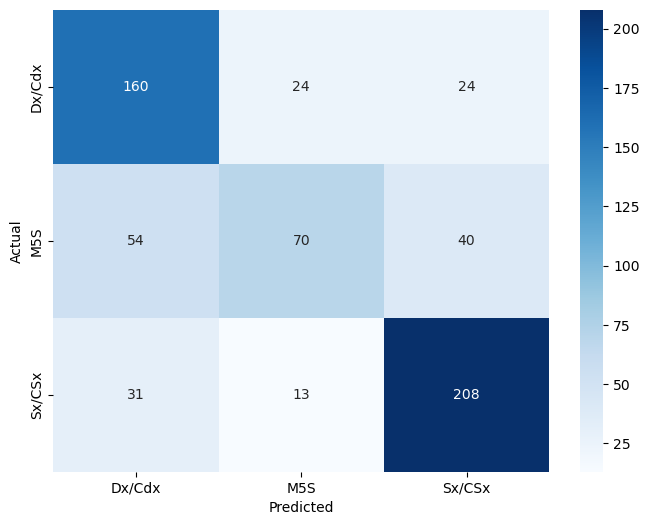

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       208
           1       0.65      0.43      0.52       164
           2       0.76      0.83      0.79       252

    accuracy                           0.70       624
   macro avg       0.69      0.67      0.67       624
weighted avg       0.70      0.70      0.69       624



In [34]:
# Fai previsioni sul set di test
y_pred_lgb = miglior_modello.predict(X_test)

# Calcola la matrice di confusione
cm = confusion_matrix(y_test, y_pred_lgb)


# Visualizza la matrice di confusione utilizzando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
#plt.title("Matrice di Confusione")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualizza il classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lgb))

In [ ]:
# Calcola le metriche totali
accuracy = accuracy_score(y_test, y_pred_lgb)
precision = precision_score(y_test, y_pred_lgb, average='weighted')
recall = recall_score(y_test, y_pred_lgb, average='weighted')
f1 = f1_score(y_test, y_pred_lgb, average='weighted')

# Stampa le metriche totali
print("Accuracy:", round(accuracy,2))
print("Precision:", round(precision,2))
print("Recall:", round(recall,2))
print("F1 Score:", round(f1,2))

Accuracy: 0.7
Precision: 0.7
Recall: 0.7
F1 Score: 0.69


In [ ]:
import shap
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('classifier',
                 LGBMClassifier(colsample_bytree=0.4990388003610051,
                                learning_rate=0.08374636203523175, max_depth=20,
                                n_estimators=55, n_jobs=4, num_leaves=78,
                                random_state=42, reg_alpha=0.5373280206620124,
                                reg_lambda=4.534607851692488))])

In [ ]:
# Supponiamo che il GridSearchCV sia già stato eseguito e abbia trovato il miglior modello
best_model = grid_search.best_estimator_

# Estrai il classificatore LightGBM dalla pipeline
cls = best_model.named_steps['classifier']

In [ ]:
explainer_tree = shap.TreeExplainer(cls)
shap_values_tree = explainer_tree.shap_values(X_test)

In [ ]:
def get_shaps(classifier, dataset):
    print(dataset.shape)
    explainer = shap.Explainer(classifier, dataset)
    shap_values = explainer(dataset,check_additivity=False)

    explainer_tree = shap.TreeExplainer(classifier)
    shap_values_tree = explainer_tree.shap_values(dataset)
    return shap_values,shap_values_tree

In [ ]:
def plot_beeswarn(df,shap_values,filename,class_index=1):
    shap.summary_plot(shap_values[class_index], df,show=False,max_display=10,color='red',color_bar=True,class_names=True)
    fig = plt.gcf() # gcf means "get current figure"
    ax = plt.gca() #gca means "get current axes"

    fig.axes[1].yaxis.get_label().set_fontsize(22)
    # fig.axes[1].set_fontsize(24)
    plt.xlabel('SHAP value',fontsize=20)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=15)
    plt.tight_layout()
    plt.savefig('{}.png'.format(filename))

In [ ]:
explainer = shap.Explainer(cls, X_test)
shap_values = explainer(X_test,check_additivity=False)

 99%|===================| 1854/1872 [00:58<00:00]        

In [ ]:
shap_values, shap_values_tree = get_shaps(cls, X_test)

(624, 71)


100%|===================| 1868/1872 [01:24<00:00]        

In [ ]:
X_test.columns

Index(['Age', 'Public_Sector_Worker_Privilege',
       'Risk_Propensity_Italy_vs_Europe', 'Importance_of_Parties',
       'Decrease_in_Party_Role', 'Reliance_on_Public_Technocrats',
       'Resistance_Values_from_Another_Era', 'Unions_Still_Useful',
       'Social_Equality_Restrains_Individuals',
       'Too_Much_Focus_on_Equality_vs_Merit',
       'Better_Equality_vs_Individual_Merit',
       'Disorientation_vs_Daily_Reality',
       'Globalization_Advantages_in_Markets',
       'Duty_to_Defend_National_Production', 'Not_Safe_Where_You_Live',
       'Repression_as_Only_Weapon_Against_Crime',
       'Crime_Will_Become_Uncontainable', 'Validity_of_Church_Teachings',
       'Society_Too_Permissive_of_Gays', 'Legalization_of_Soft_Drugs',
       'Church_Shouldn’t_Influence_State', 'Biological_Will',
       'Immigrants_Steal_Jobs', 'Immigrants_as_a_Resource',
       'Immigrants_Bring_Crime', 'Immigrants_Must_Adapt',
       'Immigrants’_Right_to_Vote', 'Immigrants_Don’t_Respect_Social_Rules'

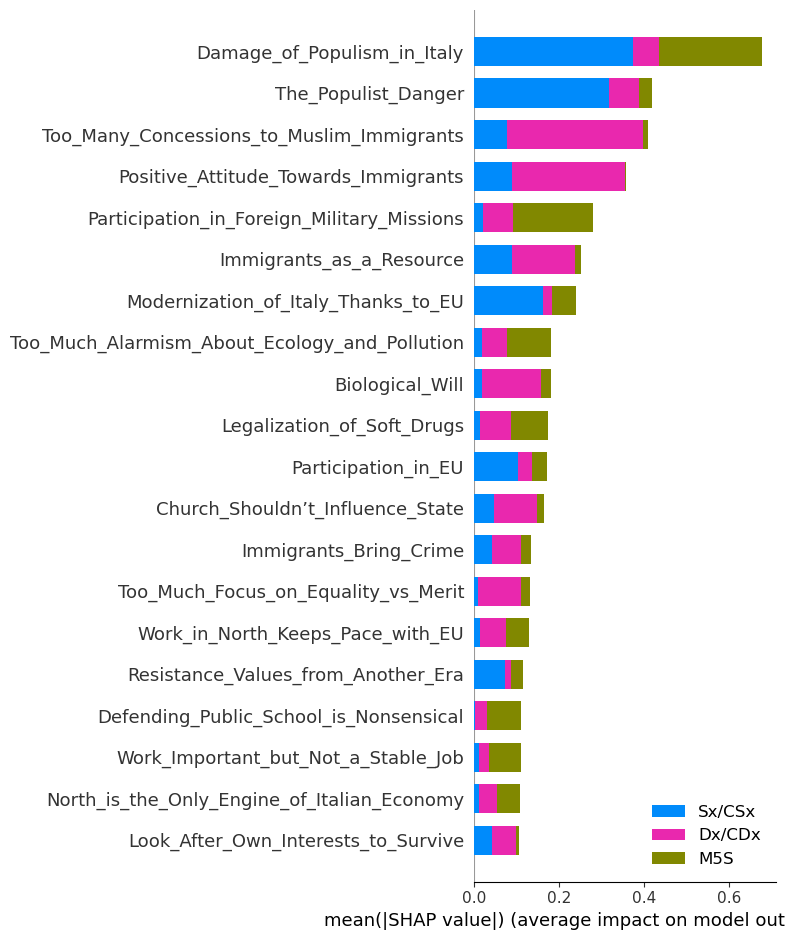

In [ ]:
shap.summary_plot(shap_values_tree, X_test.values, plot_type="bar", class_names= class_names , feature_names = X_test.columns)

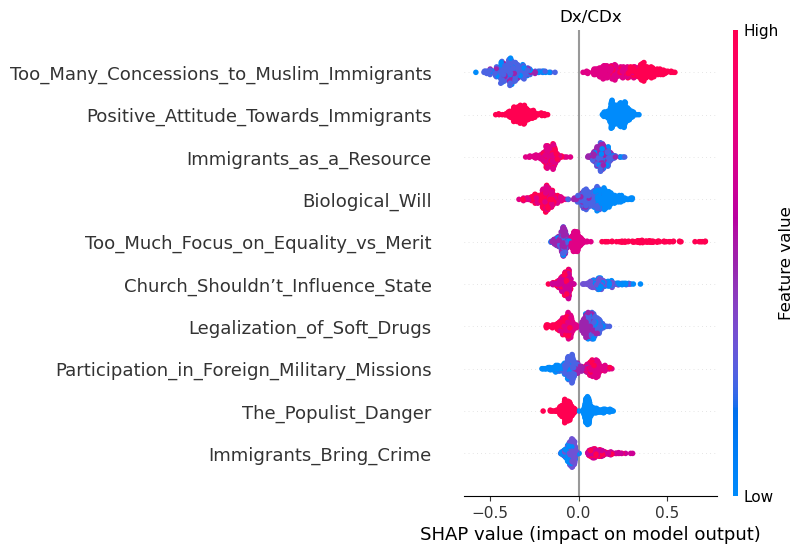

In [ ]:
shap.summary_plot(shap_values_tree[0], X_test.values, feature_names = X_test.columns ,max_display=10, show=False)
plt.title("Dx/CDx")
plt.show()

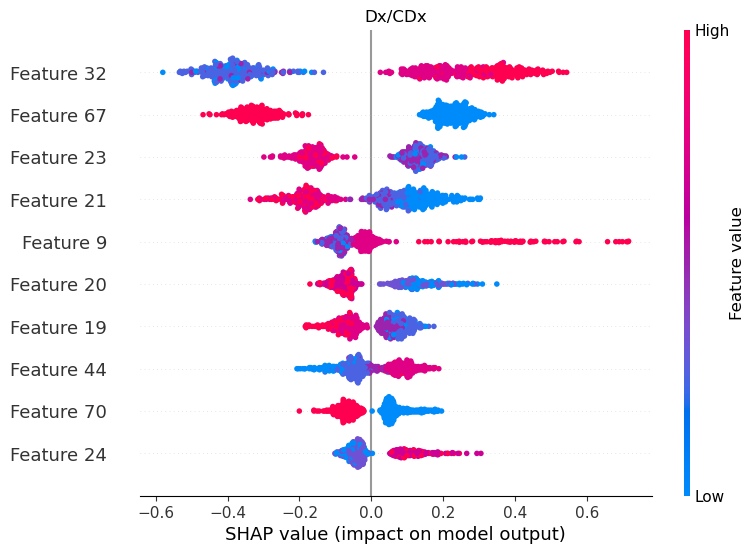

In [ ]:
shap.summary_plot(shap_values_tree[0], X_test.values,max_display=10, show=False)
plt.title("Dx/CDx")
plt.show()

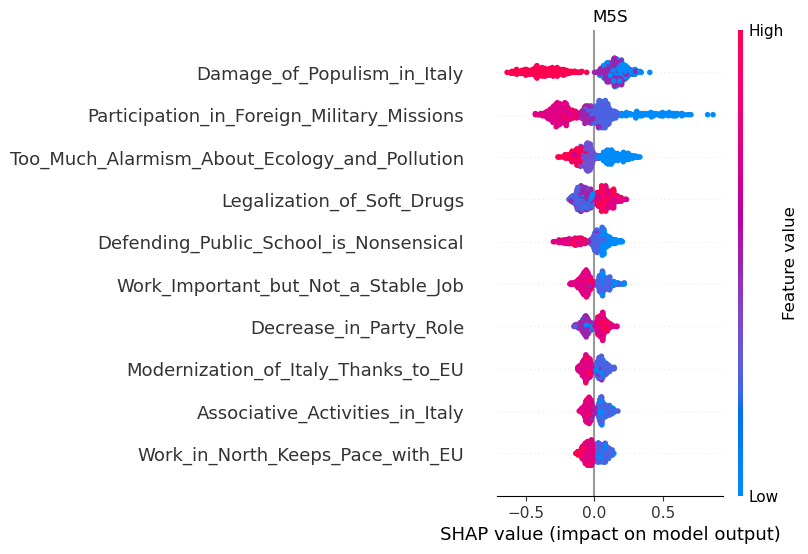

In [ ]:
shap.summary_plot(shap_values_tree[1], X_test.values, feature_names = X_test.columns ,max_display=10 ,show=False)
plt.title("M5S")
plt.show()

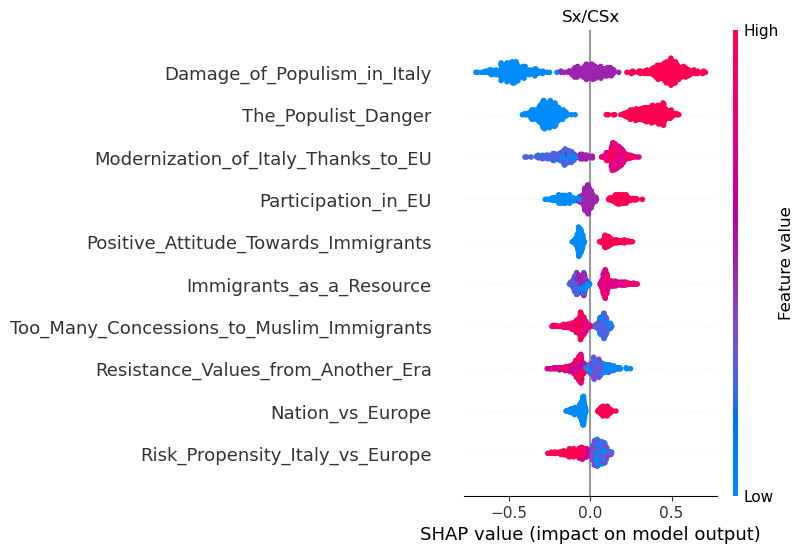

In [ ]:
shap.summary_plot(shap_values_tree[2], X_test.values, feature_names = X_test.columns, show=False ,max_display=10)
plt.title("Sx/CSx")
plt.show()

In [ ]:
model = cls

In [ ]:
from itertools import combinations
from sklearn.metrics import accuracy_score, log_loss

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
top_ten = [
 'Damage_of_Populism_in_Italy',
 'The_Populist_Danger',
 'Modernization_of_Italy_Thanks_to_EU',
 'Participation_in_EU',
 'Positive_Attitude_Towards_Immigrants',
 'Immigrants_as_a_Resource',
 'Too_Many_Concessions_to_Muslim_Immigrants',
 'Resistance_Values_from_Another_Era',
 'Nation_vs_Europe',
 'Risk_Propensity_Italy_vs_Europe'
]

In [ ]:
top_ten_d = [
 'Church_Shouldn’t_Influence_State',
 'Positive_Attitude_Towards_Immigrants',
 'Too_Many_Concessions_to_Muslim_Immigrants',
 'Immigrants_as_a_Resource',
 'Biological_Will',
 'Too_Much_Focus_on_Equality_vs_Merit',
 'Legalization_of_Soft_Drugs',
 'Participation_in_Foreign_Military_Missions',
 'The_Populist_Danger',
 'Immigrants_Bring_Crime'
]

In [ ]:
top_ten_g = [
 'Damage_of_Populism_in_Italy',
 'Participation_in_Foreign_Military_Missions',
 'Too_Much_Alarmism_About_Ecology_and_Pollution',
 'Legalization_of_Soft_Drugs',
 'Defending_Public_School_is_Nonsensical',
 'Work_Important_but_Not_a_Stable_Job',
 'Decrease_in_Party_Role',
 'Modernization_of_Italy_Thanks_to_EU',
 'Associative_Activities_in_Italy',
 'Work_in_North_Keeps_Pace_with_EU'
]

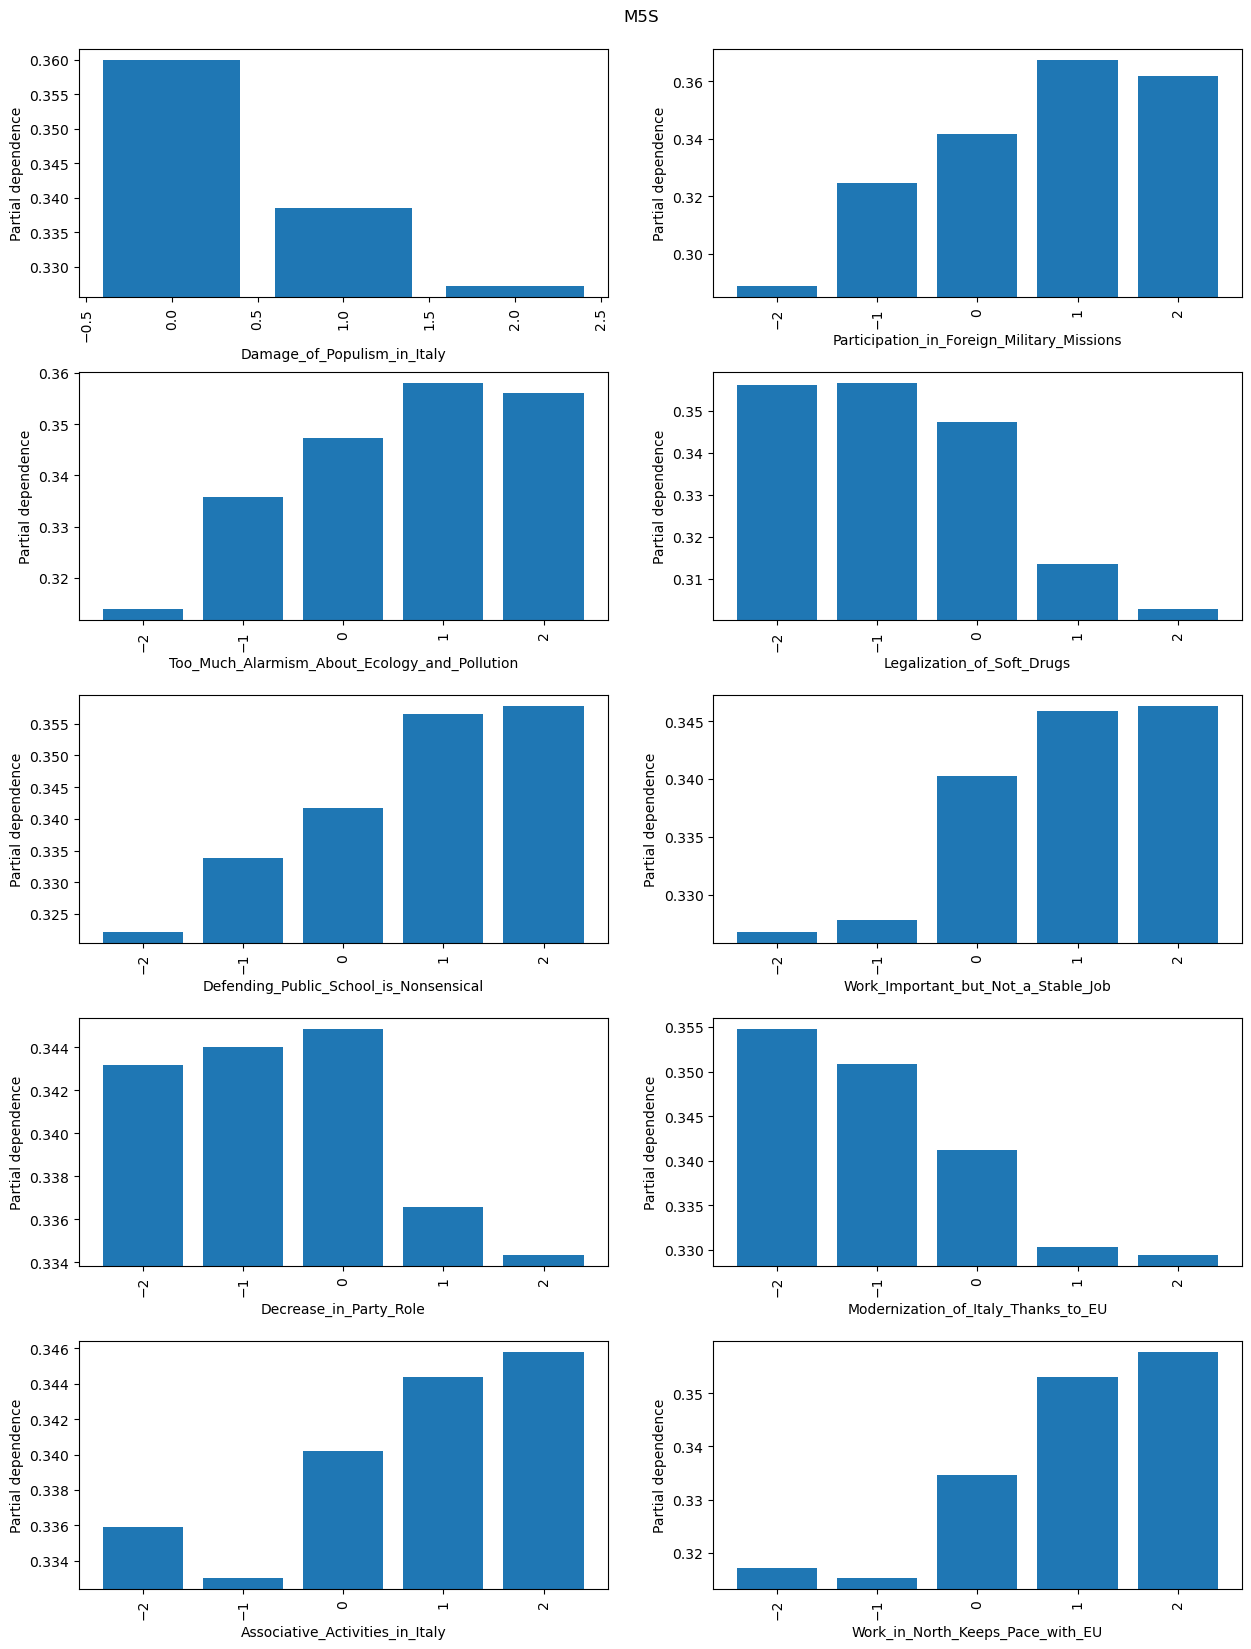

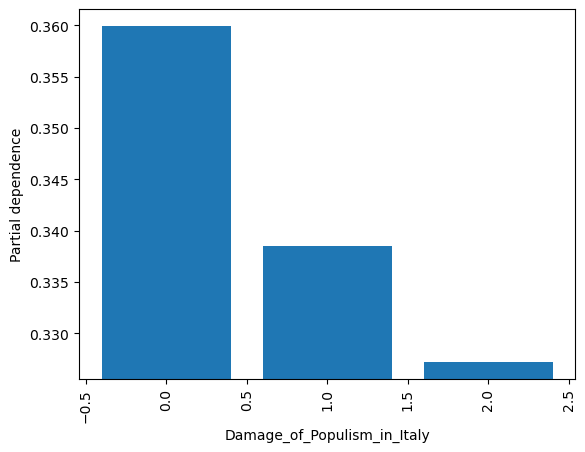

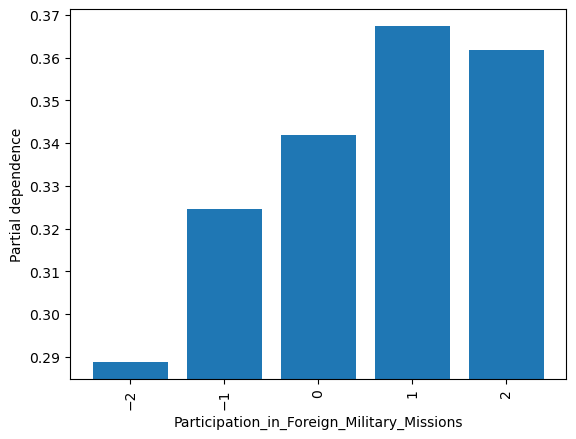

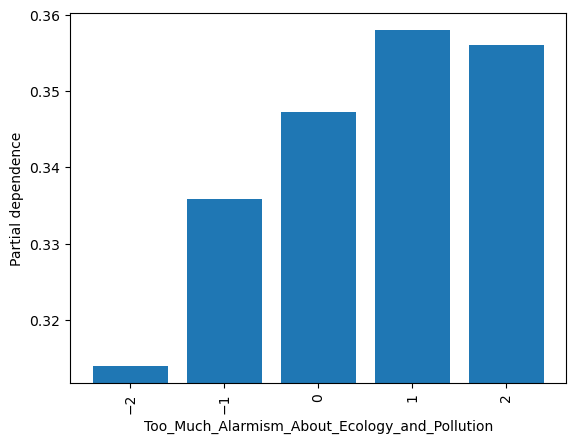

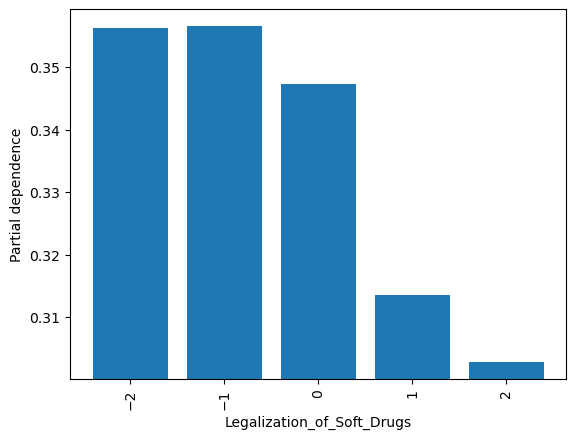

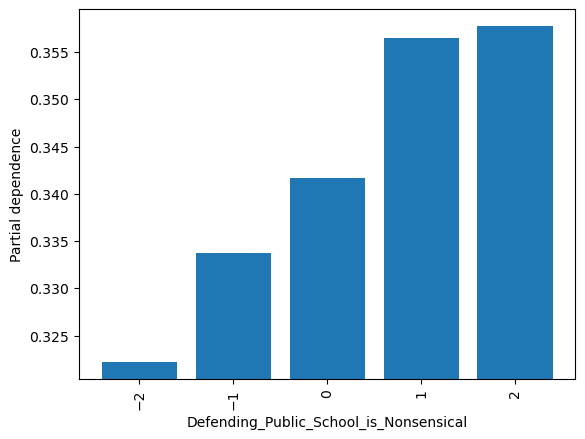

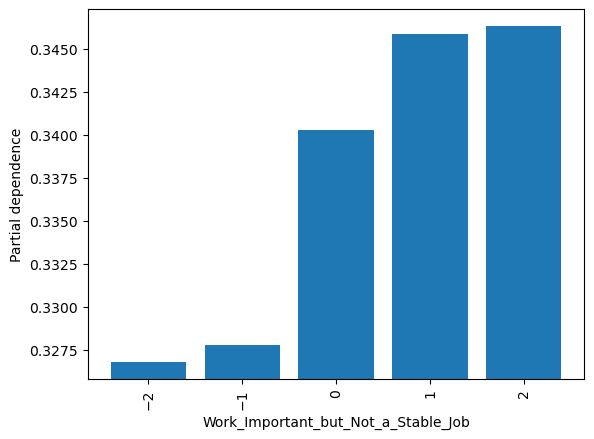

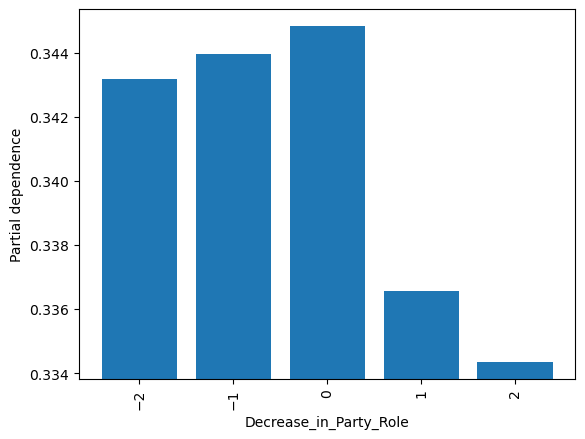

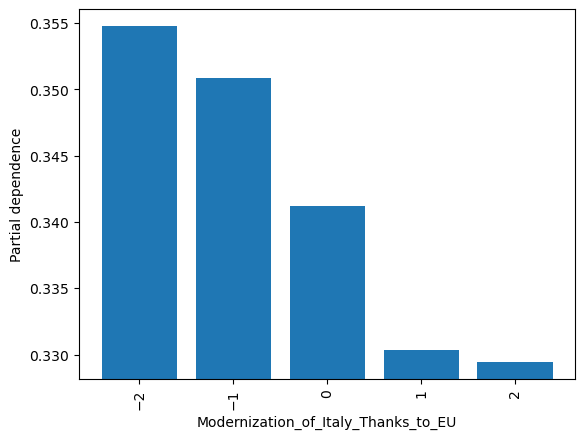

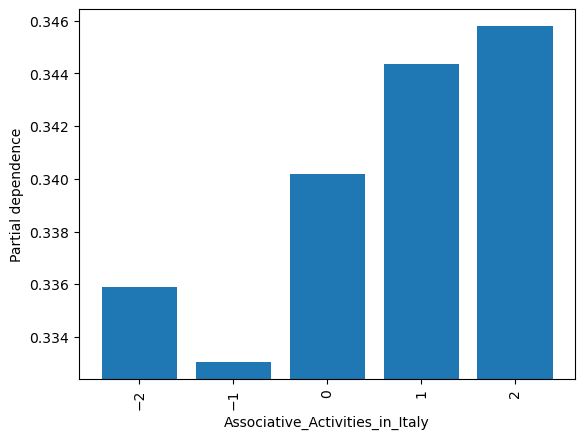

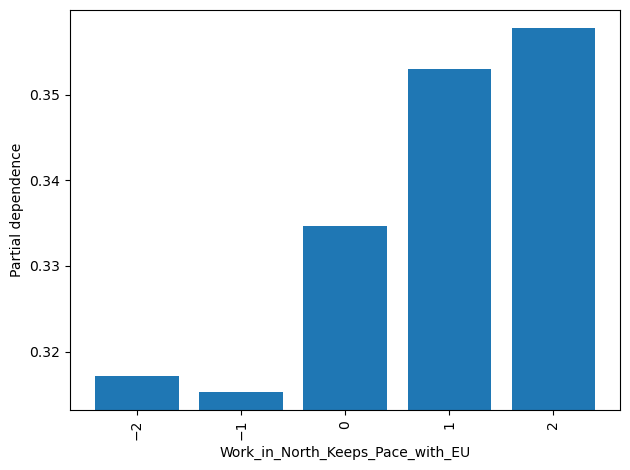

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(15, 20))  # Griglia di 5 righe e 2 colonne
plt.subplots_adjust(hspace=0.3, wspace=0.2)

fig.suptitle('M5S', y=0.9)

for i, feature in enumerate(top_ten_g):
    row = i // 2  # Indice di riga
    col = i % 2   # Indice di colonna
    ax = axes[row, col]  # Seleziona l'asse corrispondente alla posizione nella griglia
    
    pdp_display = PartialDependenceDisplay.from_estimator(
        best_model.named_steps['classifier'],
        X_test,
        [feature],
        target=0,
        categorical_features= top_ten_g
    )
    pdp_display.plot(ax=ax, line_kw={'linewidth': 2})
    #ax.set_title(f'{feature}')  # Imposta il titolo del grafico
    


plt.tight_layout()  # Regola automaticamente la disposizione dei grafici
plt.show()


In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
# Calcola l'importanza delle caratteristiche con la Permutation Feature Importance
results = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Visualizza l'importanza delle caratteristiche
print("Importanza delle caratteristiche:")
for feature, importance in zip(X.columns, results.importances_mean):
    print(f"{feature}: {importance}")

Importanza delle caratteristiche:
Age: 0.002403846153846112
Public_Sector_Worker_Privilege: 0.00016025641025637637
Risk_Propensity_Italy_vs_Europe: 0.0036858974358974115
Importance_of_Parties: 0.0043269230769230616
Decrease_in_Party_Role: 0.005929487179487158
Reliance_on_Public_Technocrats: 0.0064102564102563875
Resistance_Values_from_Another_Era: 0.003525641025640991
Unions_Still_Useful: 0.001282051282051222
Social_Equality_Restrains_Individuals: 0.002564102564102555
Too_Much_Focus_on_Equality_vs_Merit: 0.0025641025641025108
Better_Equality_vs_Individual_Merit: 0.0014423076923076538
Disorientation_vs_Daily_Reality: 0.0014423076923076761
Globalization_Advantages_in_Markets: 0.0022435897435897135
Duty_to_Defend_National_Production: -4.4408920985006264e-17
Not_Safe_Where_You_Live: 0.0011217948717948568
Repression_as_Only_Weapon_Against_Crime: -0.004326923076923161
Crime_Will_Become_Uncontainable: 0.0011217948717948457
Validity_of_Church_Teachings: 0.00448717948717946
Society_Too_Permissi